In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv('DataSets/loan_prediction.csv')
df.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [4]:
#Handling missing values data.
print("Missing values before handling:")
print(df.isnull().sum())
# df.shape
# df.describe()
# print("\nPercentage of missing values:")
# print(df.isnull().sum()/len(df)*100)
# df.info()

Missing values before handling:
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [5]:
print('Imputing categorical columns with their mode....')
for col in ['Gender', 'Dependents', 'Self_Employed']:
    #check if there is any missing values bofore attemping to fill
    if df[col].isnull().any():
        mode_val = df[col].mode()[0] #.mode() return the series so take the first element.
        df[col] = df[col].fillna(mode_val)
        print(f' Filled missing values in {col} with mode: {mode_val}')


Imputing categorical columns with their mode....
 Filled missing values in Gender with mode: Male
 Filled missing values in Dependents with mode: 0
 Filled missing values in Self_Employed with mode: No


In [6]:
print('Imputing numerical columns with their median...')
for col in ['LoanAmount', 'Loan_Amount_Term']:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f'Filled missing values in {col} with median: {median_val}')

Imputing numerical columns with their median...
Filled missing values in LoanAmount with median: 125.0
Filled missing values in Loan_Amount_Term with median: 360.0


In [7]:
print('Imputing credit history with it\'s mode')
if df['Credit_History'].isnull().any():
    mode_credit_history = df['Credit_History'].mode()[0]
    df['Credit_History'] = df['Credit_History'].fillna(mode_credit_history)
    print(f'Filled missing values in Credit_History with mode: {mode_credit_history}')

Imputing credit history with it's mode
Filled missing values in Credit_History with mode: 1.0


In [8]:
df.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,No,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


Generating visualization for key features....



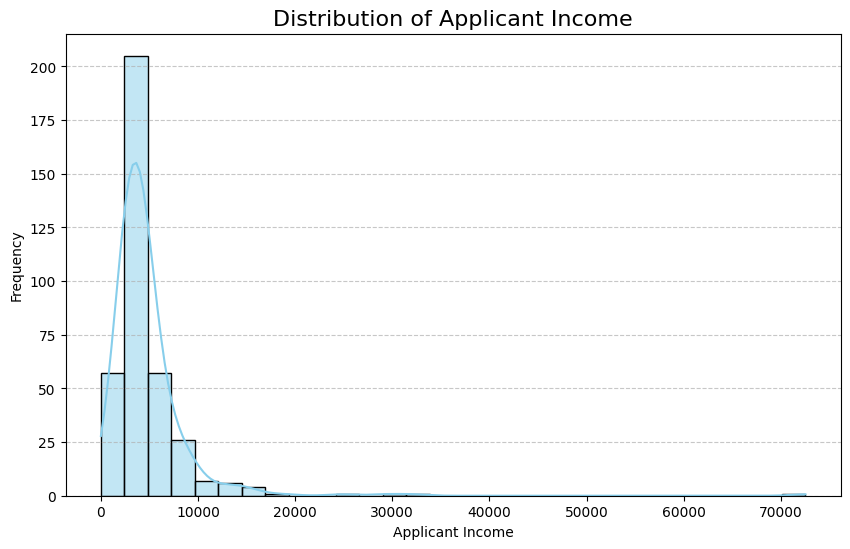

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
print('Generating visualization for key features....\n')
# ---- 1. Applicant income distribution (Histogram)------
plt.figure(figsize=(10,6))
sns.histplot(df['ApplicantIncome'], kde=True, bins= 30, color='skyblue')
plt.title('Distribution of Applicant Income', fontsize=16)
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha = 0.7)
plt.show()

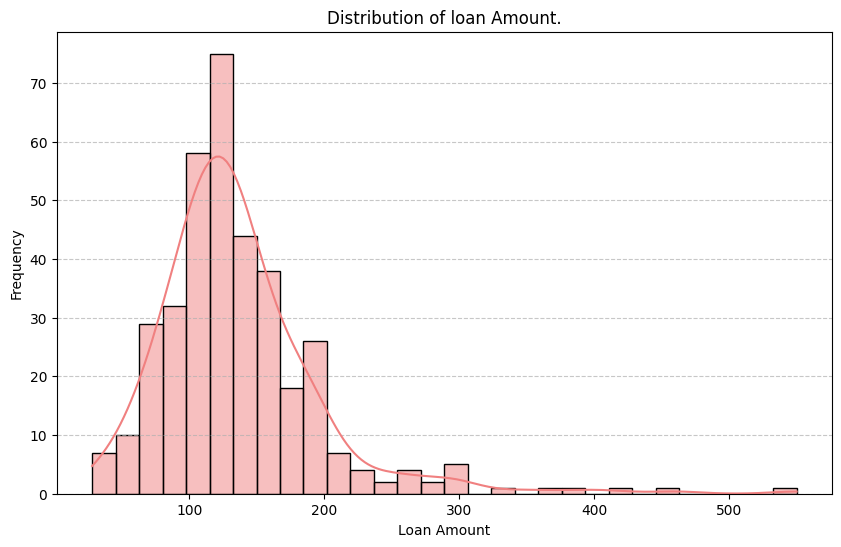

In [10]:
# ---- 2. Loan Amount Distribution (Histrogram)------
plt.figure(figsize=(10,6))
sns.histplot(df['LoanAmount'], kde=True, bins=30, color='lightcoral')
plt.title('Distribution of loan Amount.')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha =0.7)
plt.show()

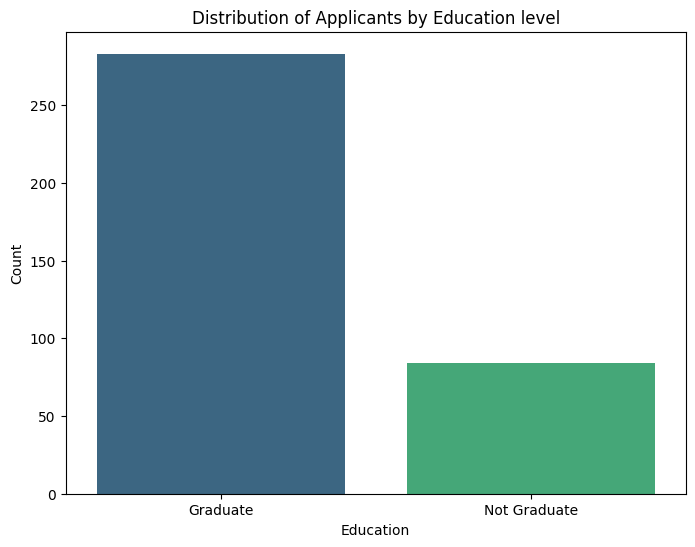

In [11]:
# 3. Visualize Education Distribution (count plot for categorical data)
plt.figure(figsize=(8,6))
sns.countplot(x='Education', data=df, hue='Education', palette='viridis')
plt.title('Distribution of Applicants by Education level')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

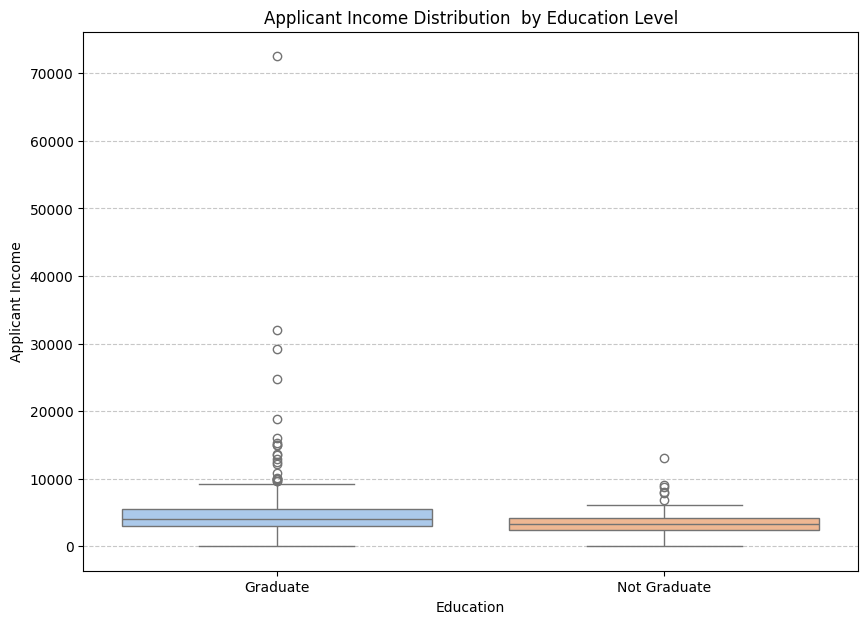

In [12]:
# 4. visualize Applicant Income vs. Education (boxplot for comparison)
plt.figure(figsize=(10,7))
# using Education as x and ApplicantIcome as y
sns.boxplot(x='Education', y='ApplicantIncome', data=df , hue='Education', palette='pastel')
plt.title('Applicant Income Distribution  by Education Level')
plt.xlabel('Education')
plt.ylabel('Applicant Income')
plt.grid(axis='y', linestyle='--', alpha= 0.7)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
df2 = pd.read_csv('DataSets/train_loan_prediction.csv')
print("read successfully")
df2.head(5)

# print('----Starting Model Training-----')

read successfully


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
print("----Staring training model----")
if 'Loan_Status' in df2.columns:
    df2['Loan_Status'] = df2['Loan_Status'].map({'Y':1,'N':0})
    print("'Loan_Status' column converted into (Y=1,N=0)")
else:
    ('Loan_Status column is not found.')    
    exit
X = df2.drop(['Loan_Status', 'Loan_ID'], axis=1 )    
Y = df2['Loan_Status']
print(f'\nFeatures X shape: {X.shape}')
print(f'Target Y shape: {Y.shape}')
X.head()

----Staring training model----
'Loan_Status' column converted into (Y=1,N=0)

Features X shape: (614, 11)
Target Y shape: (614,)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [19]:
# ----2. Encode Categorical variables (one-hot encoding)----
categorical_cols = X.select_dtypes(include="object").columns
print(f'\nCategorical columns to encode: {list(categorical_cols)}')
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True, dtype=int)
print(f'\nFeature (X) shape after one-hot encoding: {X.shape}')
print('\nFirst 5 rows of features X after encoding')
X.head(15)



Categorical columns to encode: []

Feature (X) shape after one-hot encoding: (614, 14)

First 5 rows of features X after encoding


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,0,1,0,1
6,2333,1516.0,95.0,360.0,1.0,1,1,0,0,0,1,0,0,1
7,3036,2504.0,158.0,360.0,0.0,1,1,0,0,1,0,0,1,0
8,4006,1526.0,168.0,360.0,1.0,1,1,0,1,0,0,0,0,1
9,12841,10968.0,349.0,360.0,1.0,1,1,1,0,0,0,0,1,0


In [22]:
# -----3. Split data into training and testing set.----
#split data with 20/80 ratio.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42, stratify=Y)
# stratify=y ensures that the proportion of 'Y' and 'N' in Loan_Status is the same in both train and test sets,
# which is important for imbalanced datasets.
print(f'\nTraining set features X_train: {X_train.shape}')
print(f'\nTraining set features X_test: {X_test.shape}')
print(f'\nTraining set features Y_train: {Y_train.shape}')
print(f'\nTraining set features Y_test: {Y_test.shape}')
Y_test.head(6)


Training set features X_train: (491, 14)

Training set features X_test: (123, 14)

Training set features Y_train: (491,)

Training set features Y_test: (123,)


150    0
559    1
598    1
235    1
145    1
191    0
Name: Loan_Status, dtype: int64

In [27]:
# ----4. Train the Logistic Regression Model----
print('\nTraining logistic regression model...')
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, Y_train)
print('Model training complete.')

print("\n--- Model Training Summary ---")
# Optional: display coefficients and intercept
print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_}")

print("\nModel has been successfully trained! Ready for evaluation.")


Training logistic regression model...
Model training complete.

--- Model Training Summary ---
Model coefficients: [[-3.43037740e-06 -5.75501019e-05 -4.40734380e-04 -1.85267027e-03
   2.93443257e+00 -2.42807198e-01  4.34377890e-01 -2.50814481e-01
   3.09194705e-01  1.13516279e-01 -4.34139792e-01 -1.81059813e-01
   6.88526466e-01  5.89332312e-02]]
Model intercept: [-1.10864555]

Model has been successfully trained! Ready for evaluation.


In [28]:
print('---Evaluating the trained logistic regression model---')
# 1. Make the prediction on test set
y_pred = model.predict(X_test)
print('\nPrediction made on the test set.')

# 2. Calculating accuracy score
accurcy = accuracy_score(Y_test, y_pred)
print(f'\nModel Accuracy: {accurcy:.4f}')
# 3. Generate Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print('confusion matrix')
print(conf_matrix)


---Evaluating the trained logistic regression model---

Prediction made on the test set.

Model Accuracy: 0.8618
confusion matrix
[[22 16]
 [ 1 84]]


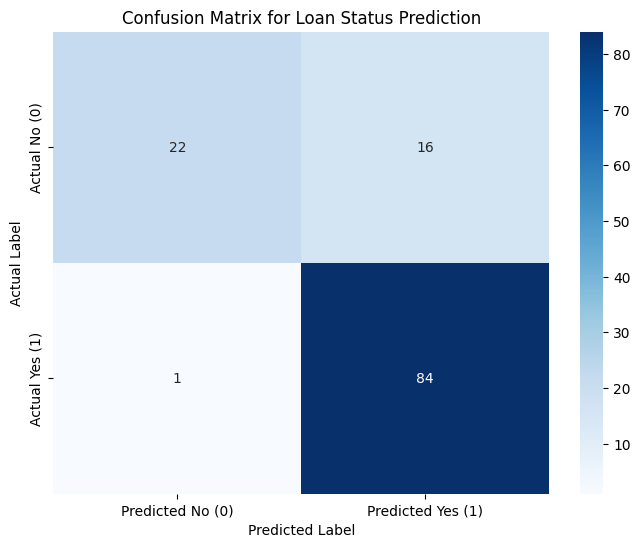

In [31]:
# Visualize Confusion matrix for better understanding
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No (0)', 'Predicted Yes (1)'], yticklabels=['Actual No (0)', 'Actual Yes (1)'])
plt.title('Confusion Matrix for Loan Status Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [33]:
# Optional: Classification Report (provides precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

print("\nModel evaluation complete!")


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123


Model evaluation complete!
